In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My\ Drive/SML312/FinalProject2

Mounted at /content/drive
/content/drive/My Drive/SML312/FinalProject2


Dataset 1:


1a. Reading the dataset, data cleaning, and EDA

In [ ]:
# read dataset
df = pd.read_csv('dataset.csv')
print('Dataset shape: ', df.shape)
print('Dataset columns:', df.columns)

Dataset shape:  (114000, 21)
Dataset columns: Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [ ]:
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


Because I want to build a model solely based on acoustic features and genre, I drop all other meta-data from the dataset. 

In [ ]:
# dropping irrelevant features
df = df.drop(labels=['track_id', 'track_name', 'artists', 'album_name', 'Unnamed: 0'], axis=1)

In [ ]:
# dropping duplicates
print('Number of duplicates: ', df.duplicated().sum())
df = df[~df.duplicated()==1]
print('New dataset shape: ', df.shape)

Number of duplicates:  7093
New dataset shape:  (106907, 16)


For now, I ignore track_genre in my correlation matrix until I encode it later.

popularity          1.000000
duration_ms        -0.037658
explicit            0.052100
danceability        0.056825
energy             -0.007603
key                -0.001787
loudness            0.071638
mode               -0.003725
speechiness        -0.061695
acousticness       -0.023203
instrumentalness   -0.142826
liveness           -0.022800
valence            -0.014620
tempo               0.002464
time_signature      0.033359
Name: popularity, dtype: float64


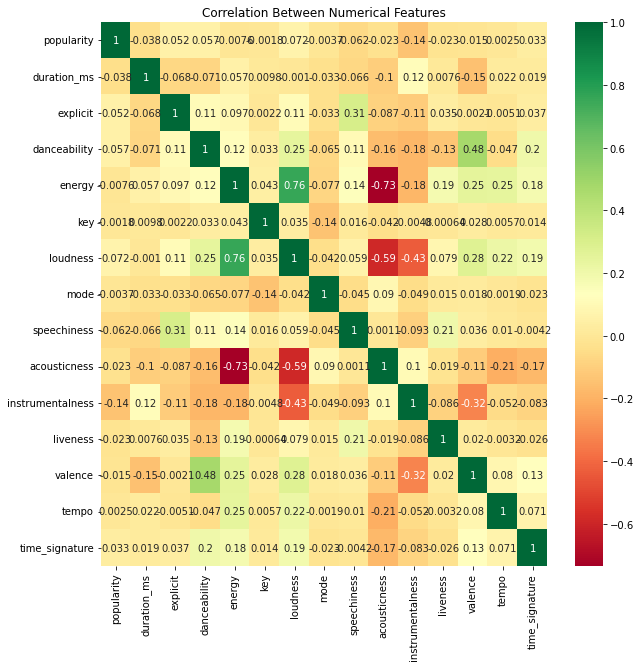

In [ ]:
# basic eda
correlation = df.corr()
print(correlation['popularity'])

plt.subplots(figsize=(10,10))
sns.heatmap(correlation, cmap= 'RdYlGn', annot=True)
plt.title('Correlation Between Numerical Features')
plt.show()

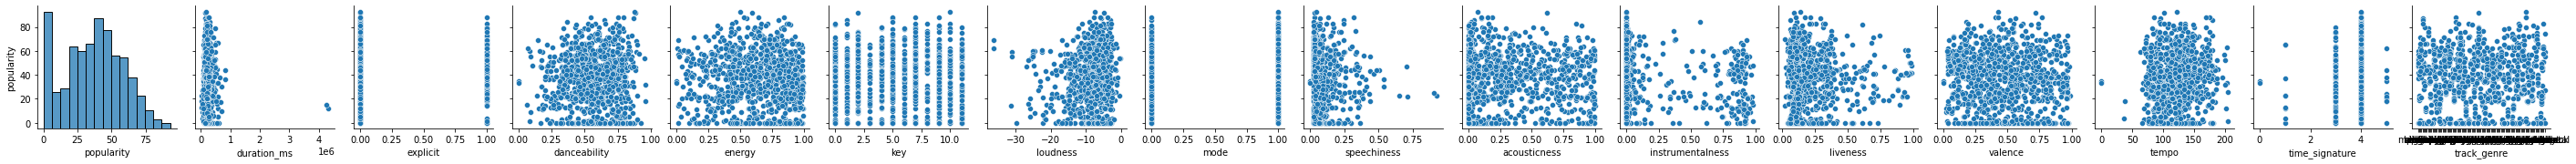

In [ ]:
# plotting sample pairplot
sample_df = df.sample(1000)
sns.pairplot(sample_df, x_vars = sample_df.columns, y_vars=["popularity"])

Number of unique genres:  114
mandopop    1000
samba       1000
mpb          999
cantopop     999
tango        999
            ... 
rock         717
country      698
dance        692
soul         675
jazz         538
Name: track_genre, Length: 114, dtype: int64


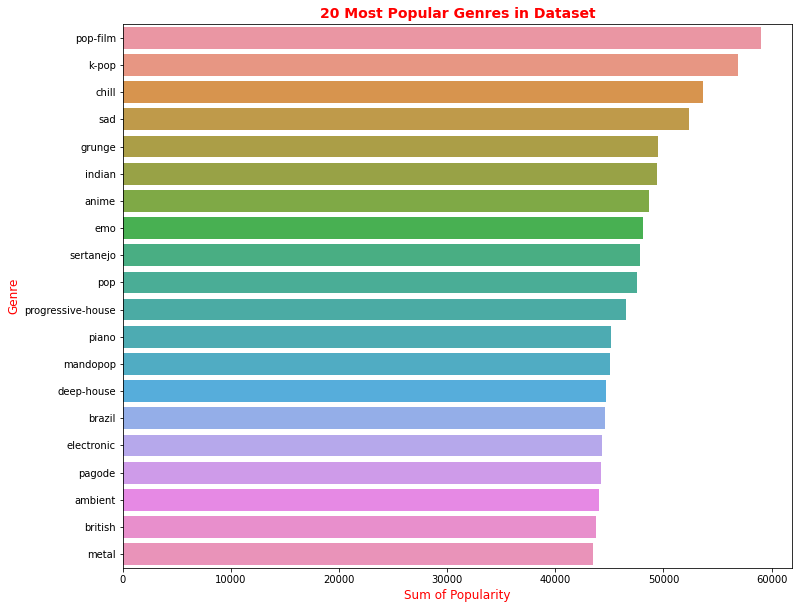

In [ ]:
# track_genre analysis
print('Number of unique genres: ', df['track_genre'].nunique())
print(df['track_genre'].value_counts())
fig, ax = plt.subplots(figsize = (12, 10))
lead_genres = df.groupby('track_genre')['popularity'].sum().sort_values(ascending=False).head(20)
ax = sns.barplot(x=lead_genres.values, y=lead_genres.index)
ax.set_xlabel('Sum of Popularity', c='r', fontsize=12)
ax.set_ylabel('Genre', c='r', fontsize=12)
ax.set_title('20 Most Popular Genres in Dataset', c='r', fontsize=14, weight = 'bold')
plt.show()

I pick three features to inspect up close based on their (relatively) high correlation in the matrix. 

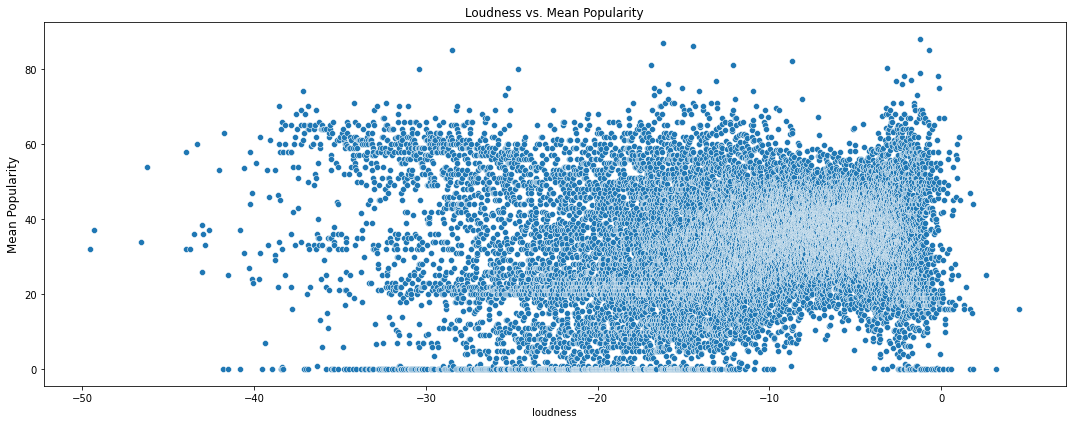

In [ ]:
# further analyzing certain features based on correlation matrix (loudness, instrumentalness, speechiness)
fig, ax = plt.subplots(figsize=(15, 6))
ax1_data =  df.groupby('loudness')['popularity'].mean().to_frame().reset_index()
ax = sns.scatterplot(x = ax1_data['loudness'], y = ax1_data['popularity'], ax=ax)
ax.set_title('Loudness vs. Mean Popularity')
ax.set_ylabel('Mean Popularity', fontsize=12)
plt.tight_layout()
plt.show()

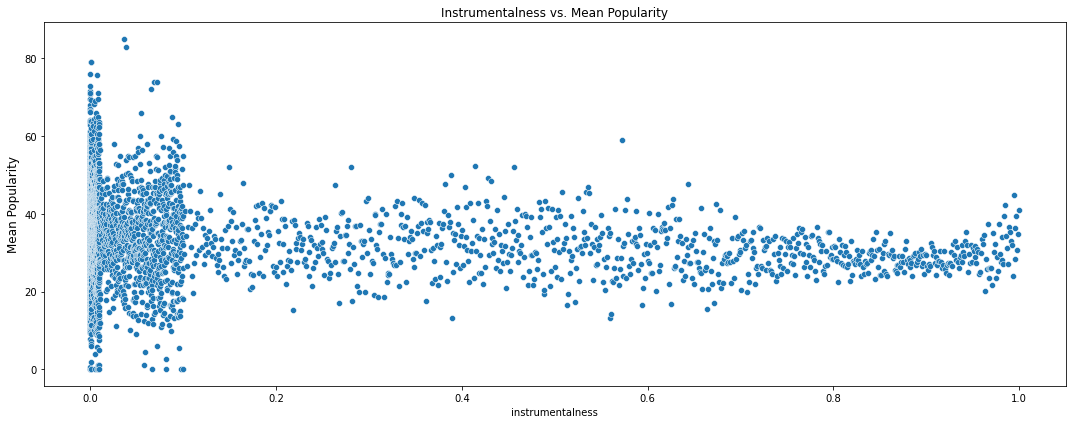

In [ ]:
# further analyzing certain features based on correlation matrix (loudness, instrumentalness, speechiness)
fig, ax = plt.subplots(figsize=(15, 6))
ax1_data =  df.groupby('instrumentalness')['popularity'].mean().to_frame().reset_index()
ax = sns.scatterplot(x = ax1_data['instrumentalness'], y = ax1_data['popularity'], ax=ax)
ax.set_title('Instrumentalness vs. Mean Popularity')
ax.set_ylabel('Mean Popularity', fontsize=12)
plt.tight_layout()
plt.show()

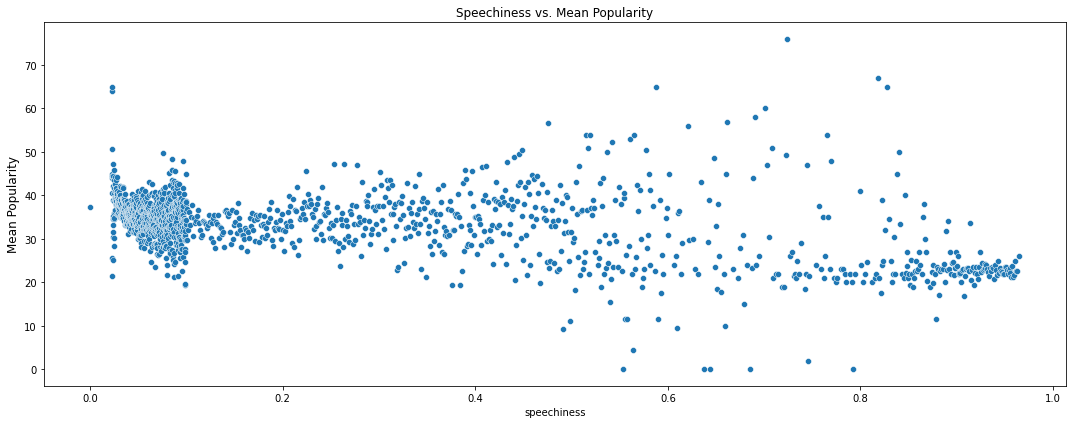

In [ ]:
# further analyzing certain features based on correlation matrix (loudness, instrumentalness, speechiness)
fig, ax = plt.subplots(figsize=(15, 6))
ax1_data =  df.groupby('speechiness')['popularity'].mean().to_frame().reset_index()
ax = sns.scatterplot(x = ax1_data['speechiness'], y = ax1_data['popularity'], ax=ax)
ax.set_title('Speechiness vs. Mean Popularity')
ax.set_ylabel('Mean Popularity', fontsize=12)
plt.tight_layout()
plt.show()

Unfortunately, it appears that these features are not very correlated with popularity in the linear sense. 

1b. Baseline model with no genre features

I build my first baseline model based only on numerical features for now. I use cross validation and pick R^2 and RMSE for my metrics. 

In [ ]:
X = df.drop(['popularity', 'track_genre'], axis = 1)
Y = df['popularity']

In [ ]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lm = LinearRegression()
lm.fit(X=X_train, y=Y_train)

Y_pred = lm.predict(X_test)

# cross validation
scores = cross_val_score(lm, X_train, Y_train, cv=5)
print("%f training accuracy with a standard deviation of %f" % (scores.mean(), scores.std()))
print('test score: %f' % (lm.score(X_test, Y_test)))

from sklearn.metrics import mean_squared_error
import math

mse = mean_squared_error(Y_test, Y_pred)
rmse = math.sqrt(mse)

print('RMSE: %f' % (rmse))

0.041304 training accuracy with a standard deviation of 0.001631
test score: 0.040218
RMSE: 20.901026


This initial performance is concerningly bad. I now try to improve my model by creating polynomial features, to see if I can fit the data better. I am able to go up to the 4th degree before running out of RAM.

In [ ]:
# trying out poly features
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

for i in range(2,5):
  steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=i)),
    ('model', LinearRegression())
  ]

  pipeline = Pipeline(steps)

  pipeline.fit(X_train, Y_train)

  scores = cross_val_score(pipeline, X_train, Y_train, cv=5)
  print("%f training accuracy with a standard deviation of %f" % (scores.mean(), scores.std()))
  print('test score: %f' % (pipeline.score(X_test, Y_test)))

0.078043 training accuracy with a standard deviation of 0.002541
test score: 0.076769
0.088723 training accuracy with a standard deviation of 0.013746
test score: 0.091359
-0.478863 training accuracy with a standard deviation of 0.417870
test score: -0.274130


Though this improves my model a bit, the performance is still very very low, so I attempt to solve that through ridge and lasso regularization. I try out different hyperparameters to find the best one. 

In [ ]:
# ridge regularization
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Ridge(alpha=10, fit_intercept=True))
]

ridge_pipe = Pipeline(steps)
ridge_pipe.fit(X_train, Y_train)

scores = cross_val_score(ridge_pipe, X_train, Y_train, cv=5)
print("%f training accuracy with a standard deviation of %f" % (scores.mean(), scores.std()))
print('test score: %f' % (ridge_pipe.score(X_test, Y_test)))

0.078048 training accuracy with a standard deviation of 0.002550
test score: 0.076769


In [ ]:
# lasso regularization 
for i in [0.1, 0.5, 1]:
  steps = [
      ('scalar', StandardScaler()),
      ('poly', PolynomialFeatures(degree=3)),
      ('model', Lasso(alpha=i, fit_intercept=True))
  ]

  lasso_pipe = Pipeline(steps)

  lasso_pipe.fit(X_train, Y_train)

  scores = cross_val_score(lasso_pipe, X_train, Y_train, cv=5)
  print("%f training accuracy with a standard deviation of %f" % (scores.mean(), scores.std()))
  print('test score: %f' % (lasso_pipe.score(X_test, Y_test)))

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.172e+05, tolerance: 3.120e+03
  model = cd_fast.enet_coordinate_descent(


0.092067 training accuracy with a standard deviation of 0.002625
test score: 0.090542
0.068203 training accuracy with a standard deviation of 0.001913
test score: 0.067130
0.047294 training accuracy with a standard deviation of 0.002028
test score: 0.047330


I find that the optimal lasso hyperparameter is 0.1, which improves my model a tiny bit.

1c. Encoding genre features (one-hot and target encoder) and repeating the process

I not use one-hot encoding to encode each of my genre features and run another linear regression model. 

In [ ]:
# one-hot encoding data
df['track_genre'].value_counts()

from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
transformed = ohe.fit_transform(df[['track_genre']])

print(ohe.categories_)

df[ohe.categories_[0]] = transformed.toarray()

[array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
       'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
       'chill', 'classical', 'club', 'comedy', 'country', 'dance',
       'dancehall', 'death-metal', 'deep-house', 'detroit-techno',
       'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm',
       'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk',
       'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove',
       'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
       'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian',
       'indie', 'indie-pop', 'industrial', 'iranian', 'j-dance', 'j-idol',
       'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino',
       'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb',
       'new-age', 'opera', 'pagode', 'party', 'piano', 'pop', 'pop-film',
       'po

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3678: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[col] = igetitem(value, i)


In [ ]:
df.head()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,...,spanish,study,swedish,synth-pop,tango,techno,trance,trip-hop,turkish,world-music
0,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


I create a new correlation matrix and see that the most correlated variables are all genres. This means that genres should play a big role in prediciting popularity. 

In [ ]:
correlation = df.corr()
print(abs(correlation['popularity']).nlargest(10))

popularity          1.000000
iranian             0.148934
instrumentalness    0.142826
romance             0.136824
detroit-techno      0.109734
pop-film            0.108635
chicago-house       0.104606
k-pop               0.103401
latin               0.096645
grindcore           0.094308
Name: popularity, dtype: float64


In [ ]:
# retrying regression
X = df.drop(['popularity', 'track_genre'], axis = 1)
Y = df['popularity']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

lm = LinearRegression()
lm.fit(X=X_train, y=Y_train)

# perform predictions and test the data
Y_pred = lm.predict(X_test)

scores = cross_val_score(lm, X_train, Y_train, cv=5)
print("%f training accuracy with a standard deviation of %f" % (scores.mean(), scores.std()))
print('test score: %f' % (lm.score(X_test, Y_test)))

mse = mean_squared_error(Y_test, Y_pred)
rmse = math.sqrt(mse)

print('RMSE: %f' % (rmse))

0.286793 training accuracy with a standard deviation of 0.002267
test score: 0.280804
RMSE: 18.230213


I see that model is performing much better, but still not very well... Next, I try regularization again, as I do not have enough RAM for polynomial features with so many columns. 

In [ ]:
steps = [
    ('scalar', StandardScaler()),
    ('model', Ridge(alpha=10, fit_intercept=True))
]

ridge_pipe = Pipeline(steps)
ridge_pipe.fit(X_train, Y_train)

scores = cross_val_score(ridge_pipe, X_train, Y_train, cv=5)
print("%f training accuracy with a standard deviation of %f" % (scores.mean(), scores.std()))
print('test score: %f' % (ridge_pipe.score(X_test, Y_test)))

0.286793 training accuracy with a standard deviation of 0.002266
test score: 0.280805


In [ ]:
for i in [0.1, 0.5, 1]:
  steps = [
      ('scalar', StandardScaler()),
      ('model', Lasso(alpha=i, fit_intercept=True))
  ]

  lasso_pipe = Pipeline(steps)

  lasso_pipe.fit(X_train, Y_train)

  scores = cross_val_score(lasso_pipe, X_train, Y_train, cv=5)
  print("%f training accuracy with a standard deviation of %f" % (scores.mean(), scores.std()))
  print('test score: %f' % (lasso_pipe.score(X_test, Y_test)))

0.284054 training accuracy with a standard deviation of 0.001745
test score: 0.278349
0.236666 training accuracy with a standard deviation of 0.001438
test score: 0.231986
0.150178 training accuracy with a standard deviation of 0.001042
test score: 0.146847


Since one-hot encoding produces an unneccessary amount of features (which prevents me from trying polynomial regression), I instead encode the features using target encoding, which replaces each instance of track_genre with the mean popularity for that genre. 

In [ ]:
# reloading dataset to undo one-hot encoding
df = pd.read_csv('dataset.csv')

In [ ]:
# dropping duplicates
print('Number of duplicates: ', df.duplicated().sum())
df = df[~df.duplicated()==1]
print('New dataset shape: ', df.shape)

Number of duplicates:  0
New dataset shape:  (114000, 21)


In [ ]:
!pip install category_encoders
import category_encoders as ce
#Create object for binary encoding
encoder= ce.TargetEncoder(cols=['track_genre'])
#Fit and Transform Data 
df_encoded=encoder.fit_transform(df['track_genre'],df['popularity']) 
df['encoded_genre'] = df_encoded

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 628 kB/s 


/usr/local/lib/python3.8/dist-packages/category_encoders/target_encoder.py:122: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change in version 2.6."
/usr/local/lib/python3.8/dist-packages/category_encoders/target_encoder.py:127: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter smoothing will change in version 2.6."


Unnamed: 0          0.032142
popularity          1.000000
duration_ms        -0.007101
explicit            0.044082
danceability        0.035448
energy              0.001056
key                -0.003853
loudness            0.050423
mode               -0.013931
speechiness        -0.044927
acousticness       -0.025472
instrumentalness   -0.095139
liveness           -0.005387
valence            -0.040534
tempo               0.013205
time_signature      0.031073
encoded_genre       0.504154
Name: popularity, dtype: float64


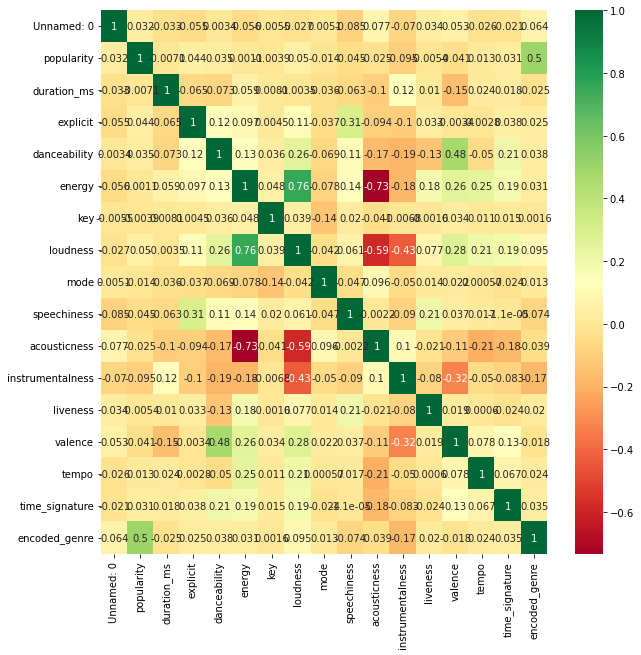

In [ ]:
# eda with new dataset
correlation = df.corr()
print(correlation['popularity'])

plt.subplots(figsize=(10,10))
sns.heatmap(correlation, cmap= 'RdYlGn', annot=True)
plt.show()

In [ ]:
# dropping irrelevant features
df = df.drop(labels=['track_id', 'track_name', 'artists', 'album_name', 'Unnamed: 0'], axis=1)

In [ ]:
#retrying regression
X = df.drop(['popularity', 'track_genre'], axis = 1)
Y = df['popularity']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

lm = LinearRegression()
lm.fit(X=X_train, y=Y_train)

## Perform predictions and test the data
Y_pred = lm.predict(X_test)

scores = cross_val_score(lm, X_train, Y_train, cv=5)
print("%f training accuracy with a standard deviation of %f" % (scores.mean(), scores.std()))
print('test score: %f' % (lm.score(X_test, Y_test)))

mse = mean_squared_error(Y_test, Y_pred)
rmse = math.sqrt(mse)

print('RMSE: %f' % (rmse))

0.258208 training accuracy with a standard deviation of 0.004460
test score: 0.258939
RMSE: 19.191747


I standardize my data and use Lasso regression to try to improve my performance more. 

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
steps = [
    ('scalar', StandardScaler()),
    ('model', Lasso(alpha=0.1, fit_intercept=True))
]

lasso_pipe = Pipeline(steps)

lasso_pipe.fit(X_train, Y_train)

scores = cross_val_score(lasso_pipe, X_train, Y_train, cv=5)
print("%f training accuracy with a standard deviation of %f" % (scores.mean(), scores.std()))
print('test score: %f' % (lasso_pipe.score(X_test, Y_test)))

0.257843 training accuracy with a standard deviation of 0.004473
test score: 0.258249


Now I analyze the feature importances for the best iteration of my linear regression model. 

Feature: 0, Score: 0.00103
Feature: 1, Score: 0.51706
Feature: 2, Score: 0.58031
Feature: 3, Score: -0.19732
Feature: 4, Score: -0.00151
Feature: 5, Score: 0.00000
Feature: 6, Score: -0.32916
Feature: 7, Score: -0.27289
Feature: 8, Score: -0.06509
Feature: 9, Score: -0.25611
Feature: 10, Score: -0.11524
Feature: 11, Score: -0.89626
Feature: 12, Score: 0.06241
Feature: 13, Score: 0.13495
Feature: 14, Score: 11.03635
Top Features:
['explicit' 'danceability' 'energy' 'mode' 'speechiness'
 'instrumentalness' 'liveness' 'valence' 'time_signature' 'encoded_genre']


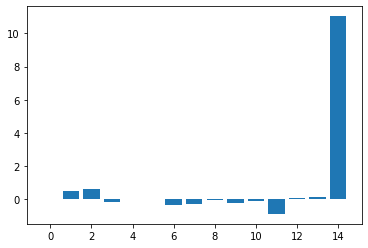

In [ ]:
# feature importance
importances = lasso_pipe.named_steps['model'].coef_
for i,v in enumerate(importances):
  print('Feature: %0d, Score: %.5f' % (i,v))
print("Top Features:")
features = X.columns
features
most_important = np.array(features)[abs(importances) > 0.1]
print(most_important)
# plot feature importance
plt.bar([x for x in range(len(importances))], importances)
plt.show()

In [ ]:
#polynomial features
for i in range(2,4):
  steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=i)),
    ('model', LinearRegression())
  ]

  pipeline = Pipeline(steps)

  pipeline.fit(X_train, Y_train)

  scores = cross_val_score(pipeline, X_train, Y_train, cv=5)
  print("%f training accuracy with a standard deviation of %f" % (scores.mean(), scores.std()))
  print('test score: %f' % (pipeline.score(X_test, Y_test)))

0.264281 training accuracy with a standard deviation of 0.007247
test score: 0.269943
0.254608 training accuracy with a standard deviation of 0.023762
test score: 0.276149


In [ ]:
steps = [
    ('scalar', StandardScaler()),
     ('poly', PolynomialFeatures(degree=3)),
    ('model', Ridge(alpha=10, fit_intercept=True))
]

ridge_pipe = Pipeline(steps)
ridge_pipe.fit(X_train, Y_train)

scores = cross_val_score(ridge_pipe, X_train, Y_train, cv=5)
print("%f training accuracy with a standard deviation of %f" % (scores.mean(), scores.std()))
print('test score: %f' % (ridge_pipe.score(X_test, Y_test)))

0.254780 training accuracy with a standard deviation of 0.023725
test score: 0.276149


In [ ]:
steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=3)),
    ('model', Lasso(alpha=0.1, fit_intercept=True))
]

lasso_pipe = Pipeline(steps)

lasso_pipe.fit(X_train, Y_train)

scores = cross_val_score(lasso_pipe, X_train, Y_train, cv=5)
print("%f training accuracy with a standard deviation of %f" % (scores.mean(), scores.std()))
print('test score: %f' % (lasso_pipe.score(X_test, Y_test)))

0.268476 training accuracy with a standard deviation of 0.007175
test score: 0.273900


1d. Exploring the genre subset

Here, I see if creating a sub-dataset with only indie/ alternative songs produces better results. 

In [ ]:
# dataset for indie/alternative songs
print(df['track_genre'].unique())
options = ['alternative', 'indie', 'alt-rock', 'indie-pop']
  
# selecting rows based on condition
alt_df = df[df['track_genre'].isin(options)]
print("New Dataset Shape: ", alt_df.shape)

['acoustic' 'afrobeat' 'alt-rock' 'alternative' 'ambient' 'anime'
 'black-metal' 'bluegrass' 'blues' 'brazil' 'breakbeat' 'british'
 'cantopop' 'chicago-house' 'children' 'chill' 'classical' 'club' 'comedy'
 'country' 'dance' 'dancehall' 'death-metal' 'deep-house' 'detroit-techno'
 'disco' 'disney' 'drum-and-bass' 'dub' 'dubstep' 'edm' 'electro'
 'electronic' 'emo' 'folk' 'forro' 'french' 'funk' 'garage' 'german'
 'gospel' 'goth' 'grindcore' 'groove' 'grunge' 'guitar' 'happy'
 'hard-rock' 'hardcore' 'hardstyle' 'heavy-metal' 'hip-hop' 'honky-tonk'
 'house' 'idm' 'indian' 'indie-pop' 'indie' 'industrial' 'iranian'
 'j-dance' 'j-idol' 'j-pop' 'j-rock' 'jazz' 'k-pop' 'kids' 'latin'
 'latino' 'malay' 'mandopop' 'metal' 'metalcore' 'minimal-techno' 'mpb'
 'new-age' 'opera' 'pagode' 'party' 'piano' 'pop-film' 'pop' 'power-pop'
 'progressive-house' 'psych-rock' 'punk-rock' 'punk' 'r-n-b' 'reggae'
 'reggaeton' 'rock-n-roll' 'rock' 'rockabilly' 'romance' 'sad' 'salsa'
 'samba' 'sertanejo' 'show

popularity          1.000000
encoded_genre       0.201545
valence             0.130109
energy              0.119774
loudness            0.105450
acousticness        0.090135
instrumentalness    0.078549
danceability        0.038110
time_signature      0.034552
duration_ms         0.028185
Name: popularity, dtype: float64


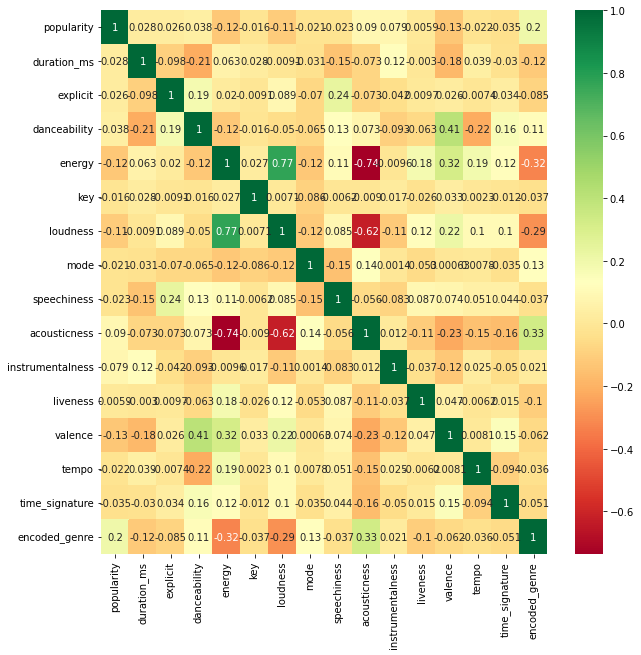

In [ ]:
# eda with new dataset
correlation = alt_df.corr()
print(abs(correlation['popularity']).nlargest(10))

plt.subplots(figsize=(10,10))
sns.heatmap(correlation, cmap= 'RdYlGn', annot=True)
plt.show()

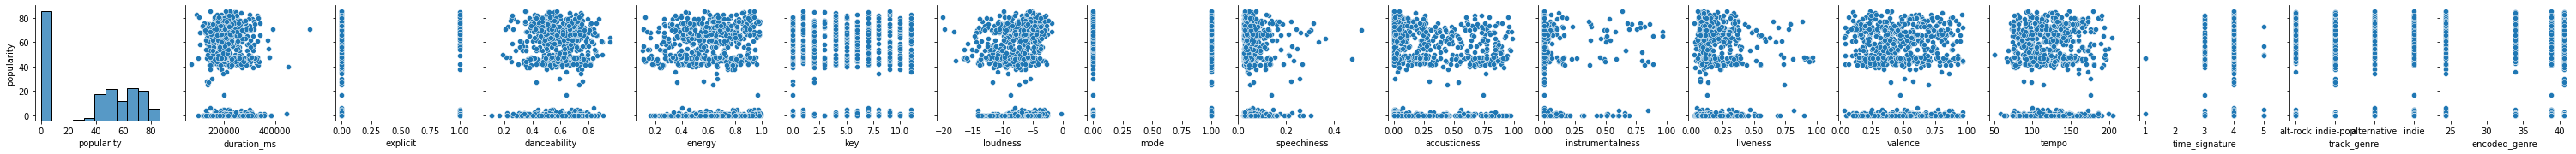

In [ ]:
# plotting sample pairplot
sample_df = alt_df.sample(1000)
sns.pairplot(sample_df, x_vars = sample_df.columns, y_vars=["popularity"])

In [ ]:
X = alt_df.drop(['popularity', 'track_genre'], axis = 1)
Y = alt_df['popularity']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

lm = LinearRegression()
lm.fit(X=X_train, y=Y_train)

## Perform predictions and test the data
Y_pred = lm.predict(X_test)
scores = cross_val_score(lm, X_train, Y_train, cv=5)
print("%f training accuracy with a standard deviation of %f" % (scores.mean(), scores.std()))
print('test score: %f' % (lm.score(X_test, Y_test)))

mse = mean_squared_error(Y_test, Y_pred)
rmse = math.sqrt(mse)

print('RMSE: %f' % (rmse))

0.06455 training accuracy with a standard deviation of 0.01305
Test score: 0.027475101893228437
RMSE: 31.02260359075384


Feature: 0, Score: 0.00002
Feature: 1, Score: 3.77460
Feature: 2, Score: 21.74584
Feature: 3, Score: 3.74521
Feature: 4, Score: 0.05254
Feature: 5, Score: 0.19475
Feature: 6, Score: 3.55474
Feature: 7, Score: 18.66021
Feature: 8, Score: 3.38790
Feature: 9, Score: 12.32714
Feature: 10, Score: 11.14416
Feature: 11, Score: 20.39004
Feature: 12, Score: 0.01278
Feature: 13, Score: 1.93361
Feature: 14, Score: 0.99208
Top Features:
['explicit' 'danceability' 'energy' 'mode' 'speechiness' 'acousticness'
 'instrumentalness' 'liveness' 'valence']


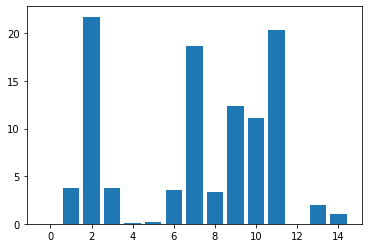

In [ ]:
# feature importance
importances = lm.coef_
importances = np.abs(importances)
for i,v in enumerate(importances):
  print('Feature: %0d, Score: %.5f' % (i,v))
print("Top Features:")
features = X.columns
features
most_important = np.array(features)[importances > 3]
print(most_important)
# plot feature importance
plt.bar([x for x in range(len(importances))], importances)
plt.show()

Interestingly enough, the linear regression model has worse results than my original baseline model. Instead of pursuing this further, I choose to explore whether the dataset could be used in a classification problem. 

1e. Classifiers

I choose 80 as a cutoff value and create an additional column in my dataset which classifies each song as either popular (1) or not popular (0). 

In [ ]:
# making a classification column
df['popular'] = np.where(df['popularity'] > 80, 1, 0)
df.head()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,encoded_genre,popular
0,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,42.483,0
1,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,42.483,0
2,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,42.483,0
3,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,42.483,0
4,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,42.483,1


In [ ]:
X = df.drop(['popularity', 'popular', 'track_genre'], axis = 1)
Y = df['popular']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

1f. Creating a baseline classification model

In [ ]:
from sklearn.svm import SVC

Confusion matrix:
[[22603     0]
 [  197     0]]


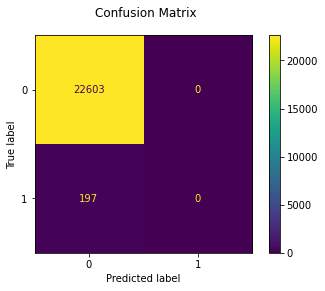

0.99170 training accuracy with a standard deviation of 0.00003
testing accuracy: 0.99136


In [ ]:
# baseline model using default params
svm_model = SVC(kernel='rbf')
svm_model.fit(X_train, Y_train)
y_pred_svm = svm_model.predict(X_test)

from sklearn import metrics
CM = metrics.ConfusionMatrixDisplay.from_predictions(Y_test, y_pred_svm)
CM.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{CM.confusion_matrix}")

plt.show()

scores = cross_val_score(svm_model, X_train, Y_train, cv=5)
print("%f training accuracy with a standard deviation of %f" % (scores.mean(), scores.std()))
print("testing accuracy: %f" % metrics.accuracy_score(y_true=Y_test, y_pred=y_pred_svm))

Dataset 2:

2a. 

In [ ]:
# merging all csv files
df2 = pd.concat(
    map(pd.read_csv, ['dataset-of-00s.csv', 'dataset-of-10s.csv', 'dataset-of-60s.csv',
                      'dataset-of-70s.csv', 'dataset-of-80s.csv', 'dataset-of-90s.csv',]), ignore_index=True)
df2.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Lucky Man,Montgomery Gentry,spotify:track:4GiXBCUF7H6YfNQsnBRIzl,0.578,0.471,4,-7.270,1,0.0289,0.368000,0.00000,0.159,0.532,133.061,196707,4,30.88059,13,1
1,On The Hotline,Pretty Ricky,spotify:track:1zyqZONW985Cs4osz9wlsu,0.704,0.854,10,-5.477,0,0.1830,0.018500,0.00000,0.148,0.688,92.988,242587,4,41.51106,10,1
2,Clouds Of Dementia,Candlemass,spotify:track:6cHZf7RbxXCKwEkgAZT4mY,0.162,0.836,9,-3.009,1,0.0473,0.000111,0.00457,0.174,0.300,86.964,338893,4,65.32887,13,0
3,"Heavy Metal, Raise Hell!",Zwartketterij,spotify:track:2IjBPp2vMeX7LggzRN3iSX,0.188,0.994,4,-3.745,1,0.1660,0.000007,0.07840,0.192,0.333,148.440,255667,4,58.59528,9,0
4,I Got A Feelin',Billy Currington,spotify:track:1tF370eYXUcWwkIvaq3IGz,0.630,0.764,2,-4.353,1,0.0275,0.363000,0.00000,0.125,0.631,112.098,193760,4,22.62384,10,1


In [ ]:
print('Dataset shape: ', df2.shape)
print('Dataset columns:', df2.columns)

Dataset shape:  (41106, 19)
Dataset columns: Index(['track', 'artist', 'uri', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'chorus_hit',
       'sections', 'target'],
      dtype='object')


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41106 entries, 0 to 41105
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track             41106 non-null  object 
 1   artist            41106 non-null  object 
 2   uri               41106 non-null  object 
 3   danceability      41106 non-null  float64
 4   energy            41106 non-null  float64
 5   key               41106 non-null  int64  
 6   loudness          41106 non-null  float64
 7   mode              41106 non-null  int64  
 8   speechiness       41106 non-null  float64
 9   acousticness      41106 non-null  float64
 10  instrumentalness  41106 non-null  float64
 11  liveness          41106 non-null  float64
 12  valence           41106 non-null  float64
 13  tempo             41106 non-null  float64
 14  duration_ms       41106 non-null  int64  
 15  time_signature    41106 non-null  int64  
 16  chorus_hit        41106 non-null  float6

In [ ]:
# dropping irrelevant features
df2 = df2.drop(labels=['track', 'uri', 'artist'], axis=1)

In [ ]:
# dropping duplicates
print('Number of duplicates: ', df2.duplicated().sum())
df2 = df2[~df2.duplicated()==1]
print('New dataset shape: ', df2.shape)

Number of duplicates:  800
New dataset shape:  (40306, 16)


In [ ]:
print(df2.isnull().sum().sum())

0


danceability        0.345984
energy              0.177292
key                 0.010814
loudness            0.285327
mode                0.079093
speechiness        -0.039944
acousticness       -0.245931
instrumentalness   -0.405726
liveness           -0.051373
valence             0.249269
tempo               0.032849
duration_ms        -0.073781
time_signature      0.104248
chorus_hit         -0.044969
sections           -0.060129
target              1.000000
Name: target, dtype: float64


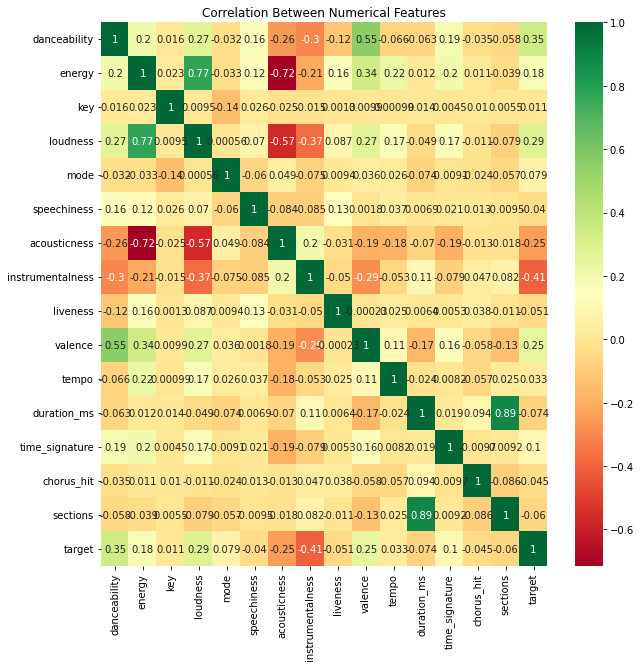

In [ ]:
# basic eda
correlation = df2.corr()
print(correlation['target'])

plt.subplots(figsize=(10,10))
sns.heatmap(correlation, cmap= 'RdYlGn', annot=True)
plt.title('Correlation Between Numerical Features')
plt.show()

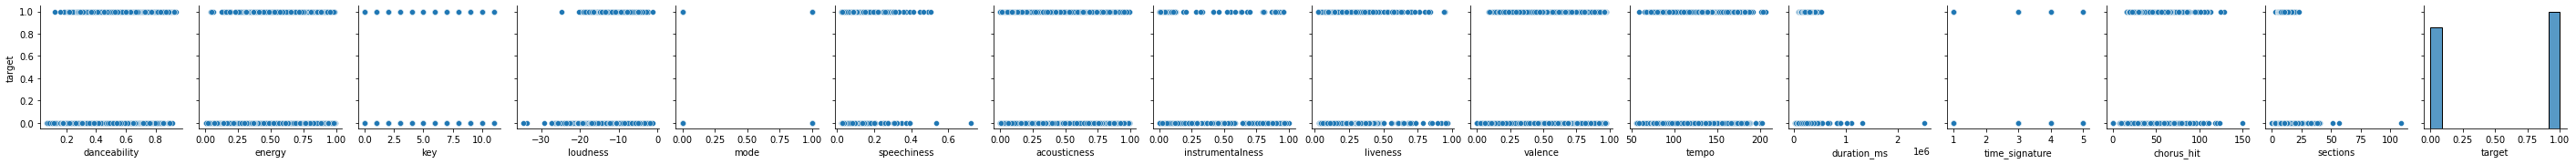

In [ ]:
sample_df2 = df2.sample(1000)
sns.pairplot(sample_df2, x_vars = sample_df2.columns, y_vars=["target"])

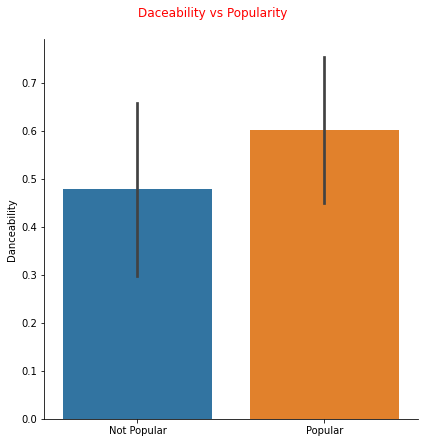

In [ ]:
# picking three features based on correlation matrix (danceability, loudness, instrumentalness)
exp_data = sns.catplot(data=df2, kind="bar",
                        x="target", y="danceability",
                        ci="sd", height=6)
exp_data.fig.suptitle('Daceability vs Popularity', y=1.05, c='r')
exp_data.set_axis_labels("", "Danceability")
exp_data.set_xticklabels(['Not Popular', 'Popular'])
plt.show()

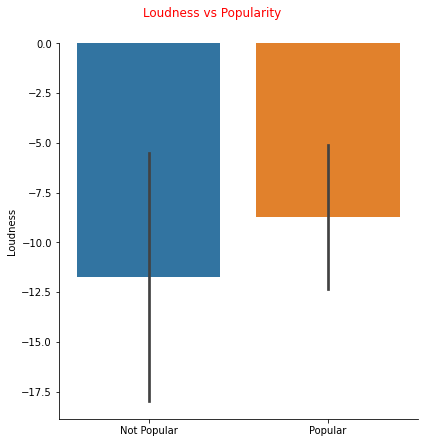

In [ ]:
# picking three features based on correlation matrix (danceability, loudness, instrumentalness)
exp_data = sns.catplot(data=df2, kind="bar",
                        x="target", y="loudness",
                        ci="sd", height=6)
exp_data.fig.suptitle('Loudness vs Popularity', y=1.05, c='r')
exp_data.set_axis_labels("", "Loudness")
exp_data.set_xticklabels(['Not Popular', 'Popular'])
plt.show()

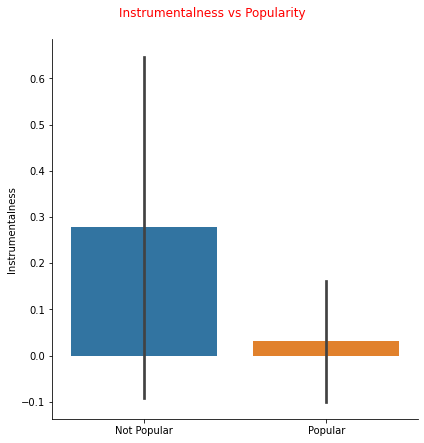

In [ ]:
# picking three features based on correlation matrix (danceability, loudness, instrumentalness)
exp_data = sns.catplot(data=df2, kind="bar",
                        x="target", y="instrumentalness",
                        ci="sd", height=6)
exp_data.fig.suptitle('Instrumentalness vs Popularity', y=1.05, c='r')
exp_data.set_axis_labels("", "Instrumentalness")
exp_data.set_xticklabels(['Not Popular', 'Popular'])
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)
from sklearn.inspection import permutation_importance
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
X = df2.drop('target', axis = 1)
y = df2['target']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2)

Confusion matrix:
[[1585 2472]
 [ 741 3264]]


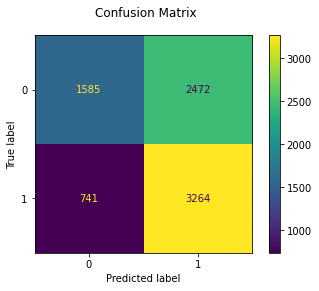

0.599026 training accuracy with a standard deviation of 0.003307
testing accuracy: 0.601464
              precision    recall  f1-score   support

           0       0.68      0.39      0.50      4057
           1       0.57      0.81      0.67      4005

    accuracy                           0.60      8062
   macro avg       0.63      0.60      0.58      8062
weighted avg       0.63      0.60      0.58      8062

gamma:  1.5274632779528002e-11


In [ ]:
# baseline SVM model with default params
svm = SVC(kernel='rbf')
svm.fit(X_train, Y_train)
pred = svm.predict(X_test)

CM = metrics.ConfusionMatrixDisplay.from_predictions(Y_test, pred)
CM.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{CM.confusion_matrix}")

plt.show()

scores = cross_val_score(svm, X_train, Y_train, cv=5)
print("%f training accuracy with a standard deviation of %f" % (scores.mean(), scores.std()))

print("testing accuracy: %f" % metrics.accuracy_score(y_true=Y_test, y_pred=pred))
print(classification_report(Y_test, pred))
print("gamma: ", svm._gamma)

In [ ]:
# hyperparameter tuning
# commenting out to save time :(

#from sklearn.model_selection import GridSearchCV

#parameters = {'C':[1, 10, 100], 
             #'gamma': [1e-2, 1e-3, 1e-4]}

#grid = GridSearchCV(SVC(), parameters, refit = True, verbose = 3)
  
# fitting the model for grid search
#grid.fit(X_train, Y_train)


# print best parameter after tuning
#print("Best Parameters: " , grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
#print("Best estimator: ", grid.best_estimator_)


Confusion matrix:
[[2174 1883]
 [1458 2547]]


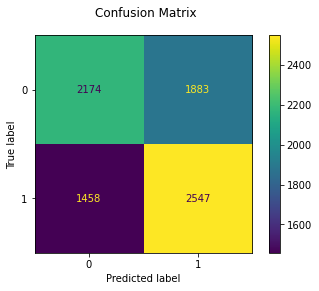

0.570928 training accuracy with a standard deviation of 0.004574
testing accuracy: 0.585587
              precision    recall  f1-score   support

           0       0.60      0.54      0.57      4057
           1       0.57      0.64      0.60      4005

    accuracy                           0.59      8062
   macro avg       0.59      0.59      0.58      8062
weighted avg       0.59      0.59      0.58      8062



In [ ]:
# rebuilding model with new params
svm = SVC(kernel='rbf', C = 1, gamma = 0.0001)
svm.fit(X_train, Y_train)
pred = svm.predict(X_test)

CM = metrics.ConfusionMatrixDisplay.from_predictions(Y_test, pred)
CM.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{CM.confusion_matrix}")

plt.show()

scores = cross_val_score(svm, X_train, Y_train, cv=5)
print("%f training accuracy with a standard deviation of %f" % (scores.mean(), scores.std()))
print("testing accuracy: %f" % metrics.accuracy_score(y_true=Y_test, y_pred=pred))
print(classification_report(Y_test, pred))

Confusion matrix:
[[2136 1921]
 [1585 2420]]


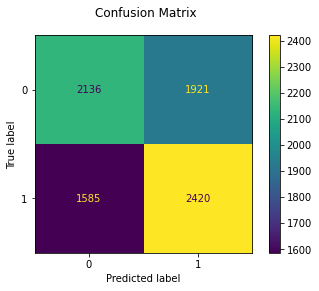

0.566059 training accuracy with a standard deviation of 0.006322
testing accuracy: 0.565120
              precision    recall  f1-score   support

           0       0.57      0.53      0.55      4057
           1       0.56      0.60      0.58      4005

    accuracy                           0.57      8062
   macro avg       0.57      0.57      0.56      8062
weighted avg       0.57      0.57      0.56      8062



In [ ]:
# KNN model with defualt params
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
pred = knn.predict(X_test)

CM = metrics.ConfusionMatrixDisplay.from_predictions(Y_test, pred)
CM.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{CM.confusion_matrix}")

plt.show()

scores = cross_val_score(knn, X_train, Y_train, cv=5)
print("%f training accuracy with a standard deviation of %f" % (scores.mean(), scores.std()))
print("testing accuracy: %f" % metrics.accuracy_score(y_true=Y_test, y_pred=pred))
print(classification_report(Y_test, pred))

Text(0, 0.5, 'accuracy')

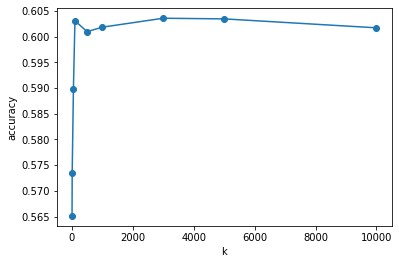

In [ ]:
# knn hyperparameter tuning
accu = []
num_neighbor_list = [5, 10, 50, 100, 500, 1000, 3000, 5000, 10000]
for k in num_neighbor_list:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, Y_train)

  ## compute accuracy on testing data ##
  pred = knn.predict(X_test)
  accu.append(metrics.accuracy_score(Y_test, pred))

plt.plot(num_neighbor_list, accu, 'o-')
plt.xlabel("k")
plt.ylabel("accuracy")

In [ ]:
# best number of neighbors
max = num_neighbor_list[np.argmax(accu)]
max

3000

Confusion matrix:
[[1798 2259]
 [ 951 3054]]


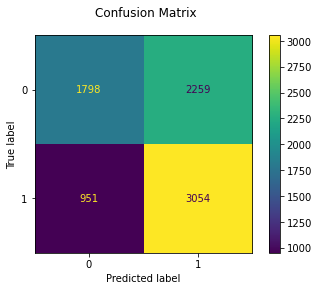

0.595801 training accuracy with a standard deviation of 0.003077
testing accuracy: 0.601836
              precision    recall  f1-score   support

           0       0.65      0.44      0.53      4057
           1       0.57      0.76      0.66      4005

    accuracy                           0.60      8062
   macro avg       0.61      0.60      0.59      8062
weighted avg       0.61      0.60      0.59      8062



In [ ]:
# New KNN model
knn = KNeighborsClassifier(n_neighbors = max)
knn.fit(X_train, Y_train)
pred = knn.predict(X_test)

CM = metrics.ConfusionMatrixDisplay.from_predictions(Y_test, pred)
CM.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{CM.confusion_matrix}")

plt.show()

scores = cross_val_score(knn, X_train, Y_train, cv=5)
print("%f training accuracy with a standard deviation of %f" % (scores.mean(), scores.std()))
print("testing accuracy: %f" % metrics.accuracy_score(y_true=Y_test, y_pred=pred))
print(classification_report(Y_test, pred))

Confusion matrix:
[[2629 1474]
 [ 764 3195]]


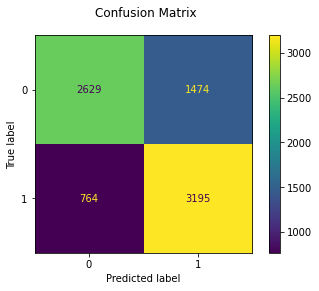

0.728632 training accuracy with a standard deviation of 0.004051
testing accuracy: 0.722401
              precision    recall  f1-score   support

           0       0.77      0.64      0.70      4103
           1       0.68      0.81      0.74      3959

    accuracy                           0.72      8062
   macro avg       0.73      0.72      0.72      8062
weighted avg       0.73      0.72      0.72      8062



In [ ]:
# Logistic Regression model with default params
logreg = Pipeline([('scaler', StandardScaler()), ('model', LogisticRegression())])

logreg.fit(X_train, Y_train)
pred = logreg.predict(X_test)

CM = metrics.ConfusionMatrixDisplay.from_predictions(Y_test, pred)
CM.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{CM.confusion_matrix}")

plt.show()

scores = cross_val_score(logreg, X_train, Y_train, cv=5)
print("%f training accuracy with a standard deviation of %f" % (scores.mean(), scores.std()))

print("testing accuracy: %f" % metrics.accuracy_score(y_true=Y_test, y_pred=pred))
print(classification_report(Y_test, pred))

Text(0, 0.5, 'accuracy')

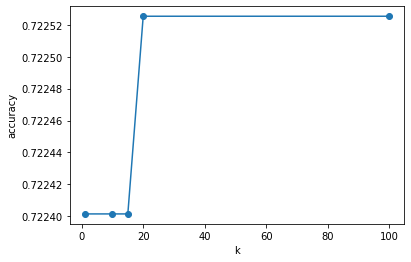

In [ ]:
# hyperparameter tuning 
accu = []
max_reg_list = [1, 10, 15, 20, 100]
for k in max_reg_list:
  logreg = Pipeline([('scaler', StandardScaler()), ('model', LogisticRegression(C=k))])
  logreg.fit(X_train, Y_train)

  ## compute accuracy on testing data ##
  pred = logreg.predict(X_test)
  accu.append(metrics.accuracy_score(Y_test, pred))

plt.plot(max_reg_list, accu, 'o-')
plt.xlabel("k")
plt.ylabel("accuracy")

In [ ]:
max = max_reg_list[np.argmax(accu)]
max

20

Confusion matrix:
[[2630 1473]
 [ 764 3195]]


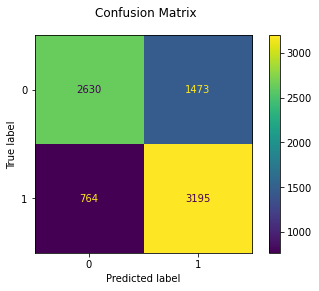

0.728570 training accuracy with a standard deviation of 0.004082
testing accuracy: 0.722525
              precision    recall  f1-score   support

           0       0.77      0.64      0.70      4103
           1       0.68      0.81      0.74      3959

    accuracy                           0.72      8062
   macro avg       0.73      0.72      0.72      8062
weighted avg       0.73      0.72      0.72      8062



In [ ]:
# new model 
logreg = Pipeline([('scaler', StandardScaler()), ('model', LogisticRegression(C=max))])

logreg.fit(X_train, Y_train)
pred = logreg.predict(X_test)

CM = metrics.ConfusionMatrixDisplay.from_predictions(Y_test, pred)
CM.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{CM.confusion_matrix}")

plt.show()

scores = cross_val_score(logreg, X_train, Y_train, cv=5)
print("%f training accuracy with a standard deviation of %f" % (scores.mean(), scores.std()))

print("testing accuracy: %f" % metrics.accuracy_score(y_true=Y_test, y_pred=pred))
print(classification_report(Y_test, pred))

Feature: 0, Score: 0.59978
Feature: 1, Score: -0.46979
Feature: 2, Score: 0.03506
Feature: 3, Score: 0.55976
Feature: 4, Score: 0.18867
Feature: 5, Score: -0.28083
Feature: 6, Score: -0.46760
Feature: 7, Score: -1.01535
Feature: 8, Score: -0.02609
Feature: 9, Score: 0.07902
Feature: 10, Score: 0.06541
Feature: 11, Score: -0.03566
Feature: 12, Score: 0.05787
Feature: 13, Score: -0.04613
Feature: 14, Score: -0.06613
Top Features:
['danceability' 'energy' 'loudness' 'acousticness' 'instrumentalness']


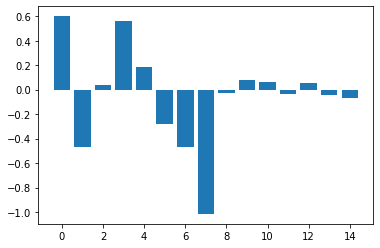

In [ ]:
# feature importances
importances = logreg.named_steps['model'].coef_
importances = importances[0]
for i,v in enumerate(importances):
  print('Feature: %0d, Score: %.5f' % (i,v))
print("Top Features:")
features = X.columns
features
most_important = np.array(features)[abs(importances) > 0.3]
print(most_important)
# plot feature importance
plt.bar([x for x in range(len(importances))], importances)
plt.show()

Confusion matrix:
[[1354 2703]
 [ 333 3672]]


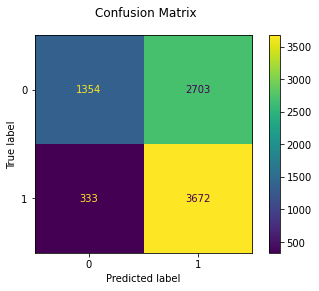

0.624953 training accuracy with a standard deviation of 0.003571
testing accuracy: 0.623419
              precision    recall  f1-score   support

           0       0.80      0.33      0.47      4057
           1       0.58      0.92      0.71      4005

    accuracy                           0.62      8062
   macro avg       0.69      0.63      0.59      8062
weighted avg       0.69      0.62      0.59      8062



In [ ]:
# Gaussian NB model
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
pred = gnb.predict(X_test)

CM = metrics.ConfusionMatrixDisplay.from_predictions(Y_test, pred)
CM.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{CM.confusion_matrix}")

plt.show()

scores = cross_val_score(gnb, X_train, Y_train, cv=5)
print("%f training accuracy with a standard deviation of %f" % (scores.mean(), scores.std()))

print("testing accuracy: %f" % metrics.accuracy_score(y_true=Y_test, y_pred=pred))
print(classification_report(Y_test, pred))

Confusion matrix:
[[2871 1232]
 [1208 2751]]


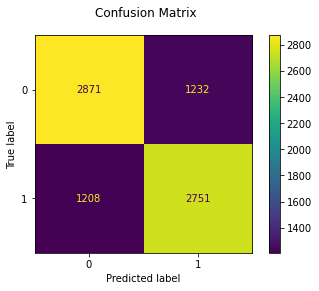

0.687384 training accuracy with a standard deviation of 0.003844
testing accuracy: 0.697346
              precision    recall  f1-score   support

           0       0.70      0.70      0.70      4103
           1       0.69      0.69      0.69      3959

    accuracy                           0.70      8062
   macro avg       0.70      0.70      0.70      8062
weighted avg       0.70      0.70      0.70      8062



In [ ]:
# Decision Tree model with default params
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)
pred = dt.predict(X_test)

CM = metrics.ConfusionMatrixDisplay.from_predictions(Y_test, pred)
CM.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{CM.confusion_matrix}")

plt.show()

scores = cross_val_score(dt, X_train, Y_train, cv=5)
print("%f training accuracy with a standard deviation of %f" % (scores.mean(), scores.std()))

print("testing accuracy: %f" % metrics.accuracy_score(y_true=Y_test, y_pred=pred))
print(classification_report(Y_test, pred))

Text(0, 0.5, 'accuracy')

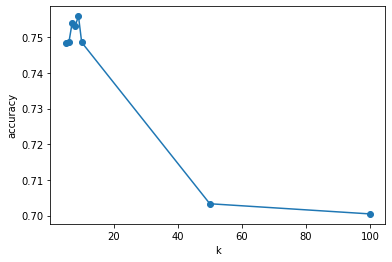

In [ ]:
# max depth tuning
accu = []
max_depth_list = [5, 6, 7, 8, 9, 10, 50, 100]
for k in max_depth_list:
  dt = DecisionTreeClassifier(max_depth = k)
  dt.fit(X_train, Y_train)

  ## compute accuracy on testing data ##
  pred = dt.predict(X_test)
  accu.append(metrics.accuracy_score(Y_test, pred))

plt.plot(max_depth_list, accu, 'o-')
plt.xlabel("k")
plt.ylabel("accuracy")

In [ ]:
max = max_depth_list[np.argmax(accu)]
max

9

Confusion matrix:
[[2513 1590]
 [ 741 3218]]


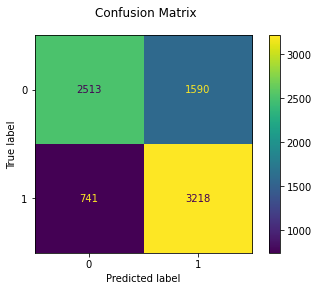

0.706054 training accuracy with a standard deviation of 0.005627
testing accuracy: 0.710866
              precision    recall  f1-score   support

           0       0.77      0.61      0.68      4103
           1       0.67      0.81      0.73      3959

    accuracy                           0.71      8062
   macro avg       0.72      0.71      0.71      8062
weighted avg       0.72      0.71      0.71      8062



In [ ]:
# 2 levels for visualization purposes 
dt = DecisionTreeClassifier(max_depth = 2)
dt.fit(X_train, Y_train)
pred = dt.predict(X_test)

CM = metrics.ConfusionMatrixDisplay.from_predictions(Y_test, pred)
CM.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{CM.confusion_matrix}")

plt.show()

scores = cross_val_score(dt, X_train, Y_train, cv=5)
print("%f training accuracy with a standard deviation of %f" % (scores.mean(), scores.std()))

print("testing accuracy: %f" % metrics.accuracy_score(y_true=Y_test, y_pred=pred))
print(classification_report(Y_test, pred))

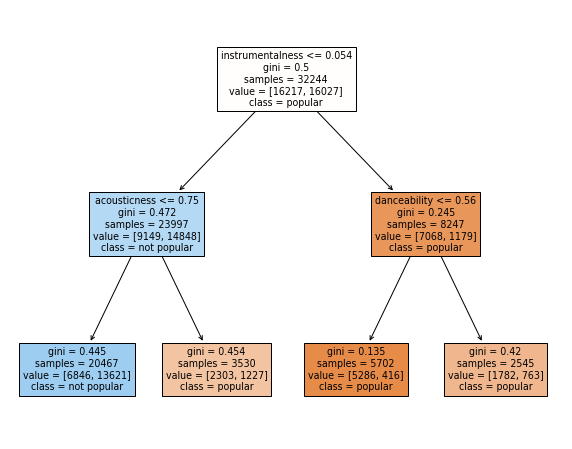

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
features = X.columns
classes= ['popular', 'not popular']
plt.figure(figsize = (10,8))
plot_tree(dt, feature_names = features, class_names = classes, filled = True);

Confusion matrix:
[[2671 1432]
 [ 536 3423]]


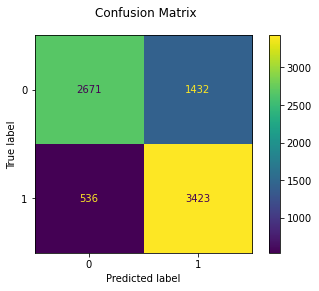

0.745379 training accuracy with a standard deviation of 0.004928
testing accuracy: 0.755892
              precision    recall  f1-score   support

           0       0.83      0.65      0.73      4103
           1       0.71      0.86      0.78      3959

    accuracy                           0.76      8062
   macro avg       0.77      0.76      0.75      8062
weighted avg       0.77      0.76      0.75      8062



In [ ]:
# Optimized Decision Tree model
dt = DecisionTreeClassifier(max_depth = max)
dt.fit(X_train, Y_train)
pred = dt.predict(X_test)

CM = metrics.ConfusionMatrixDisplay.from_predictions(Y_test, pred)
CM.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{CM.confusion_matrix}")

plt.show()

scores = cross_val_score(dt, X_train, Y_train, cv=5)
print("%f training accuracy with a standard deviation of %f" % (scores.mean(), scores.std()))

print("testing accuracy: %f" % metrics.accuracy_score(y_true=Y_test, y_pred=pred))
print(classification_report(Y_test, pred))

Feature: 0, Score: 0.11206
Feature: 1, Score: 0.05864
Feature: 2, Score: 0.00369
Feature: 3, Score: 0.02012
Feature: 4, Score: 0.00972
Feature: 5, Score: 0.06803
Feature: 6, Score: 0.14128
Feature: 7, Score: 0.46417
Feature: 8, Score: 0.00836
Feature: 9, Score: 0.02762
Feature: 10, Score: 0.01277
Feature: 11, Score: 0.05944
Feature: 12, Score: 0.00337
Feature: 13, Score: 0.00713
Feature: 14, Score: 0.00363
Top Features:
['danceability' 'acousticness' 'instrumentalness']


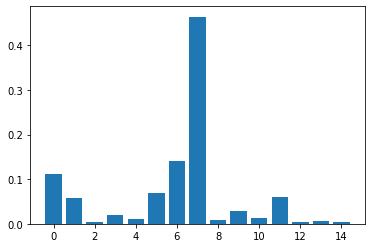

In [ ]:
# feature importances
importances = dt.feature_importances_
for i,v in enumerate(importances):
  print('Feature: %0d, Score: %.5f' % (i,v))
print("Top Features:")
features = X.columns
most_important = np.array(features)[importances > 0.1]
print(most_important)
# plot feature importance
plt.bar([x for x in range(len(importances))], importances)
plt.show()

Confusion matrix:
[[2802 1255]
 [1316 2689]]


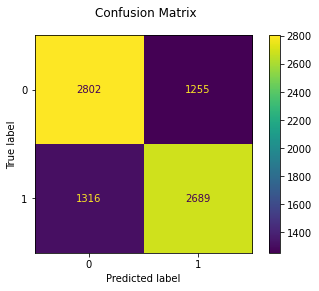

0.694982 training accuracy with a standard deviation of 0.005865
testing accuracy: 0.681097
              precision    recall  f1-score   support

           0       0.68      0.69      0.69      4057
           1       0.68      0.67      0.68      4005

    accuracy                           0.68      8062
   macro avg       0.68      0.68      0.68      8062
weighted avg       0.68      0.68      0.68      8062



In [ ]:
# Random Forest model with defualt params
rf = RandomForestClassifier()
rf = DecisionTreeClassifier()
rf.fit(X_train, Y_train)
pred = rf.predict(X_test)

CM = metrics.ConfusionMatrixDisplay.from_predictions(Y_test, pred)
CM.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{CM.confusion_matrix}")

plt.show()

scores = cross_val_score(rf, X_train, Y_train, cv=5)
print("%f training accuracy with a standard deviation of %f" % (scores.mean(), scores.std()))

print("testing accuracy: %f" % metrics.accuracy_score(y_true=Y_test, y_pred=pred))
print(classification_report(Y_test, pred))

Text(0, 0.5, 'accuracy')

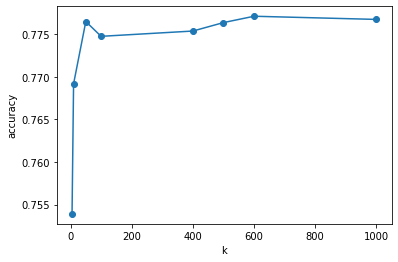

In [ ]:
# max depth tuning
accu = []
max_depth_list = [5, 10, 50, 100, 400, 500, 600, 1000]
for k in max_depth_list:
  rf = RandomForestClassifier(max_depth = k)
  rf.fit(X_train, Y_train)

  ## compute accuracy on testing data ##
  pred = rf.predict(X_test)
  accu.append(metrics.accuracy_score(Y_test, pred))

plt.plot(max_depth_list, accu, 'o-')
plt.xlabel("k")
plt.ylabel("accuracy")

In [ ]:
max = max_depth_list[np.argmax(accu)]

600

Confusion matrix:
[[2977 1080]
 [ 704 3301]]


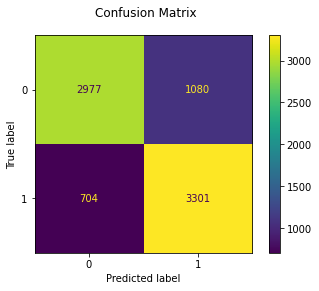

0.780734 training accuracy with a standard deviation of 0.005011
testing accuracy: 0.778715
              precision    recall  f1-score   support

           0       0.81      0.73      0.77      4057
           1       0.75      0.82      0.79      4005

    accuracy                           0.78      8062
   macro avg       0.78      0.78      0.78      8062
weighted avg       0.78      0.78      0.78      8062



In [ ]:
# Optimized Random Forest model
rf = RandomForestClassifier(max_depth = max)
rf.fit(X_train, Y_train)
pred = rf.predict(X_test)

CM = metrics.ConfusionMatrixDisplay.from_predictions(Y_test, pred)
CM.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{CM.confusion_matrix}")

plt.show()

scores = cross_val_score(rf, X_train, Y_train, cv=5)
print("%f training accuracy with a standard deviation of %f" % (scores.mean(), scores.std()))

print("testing accuracy: %f" % metrics.accuracy_score(y_true=Y_test, y_pred=pred))
print(classification_report(Y_test, pred))

Feature: 0, Score: 0.10166
Feature: 1, Score: 0.08512
Feature: 2, Score: 0.02947
Feature: 3, Score: 0.08253
Feature: 4, Score: 0.01023
Feature: 5, Score: 0.07308
Feature: 6, Score: 0.10851
Feature: 7, Score: 0.16409
Feature: 8, Score: 0.05079
Feature: 9, Score: 0.07184
Feature: 10, Score: 0.05416
Feature: 11, Score: 0.07320
Feature: 12, Score: 0.00769
Feature: 13, Score: 0.05048
Feature: 14, Score: 0.03713
Top Features:
['danceability' 'acousticness' 'instrumentalness']


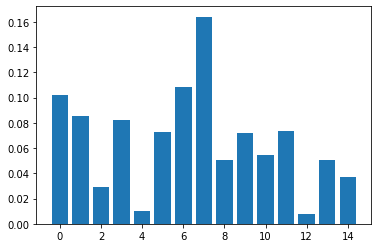

In [ ]:
#feature importances
importances = rf.feature_importances_
for i,v in enumerate(importances):
  print('Feature: %0d, Score: %.5f' % (i,v))
print("Top Features:")
features = X.columns
features
most_important = np.array(features)[importances > 0.1]
print(most_important)
# plot feature importance
plt.bar([x for x in range(len(importances))], importances)
plt.show()

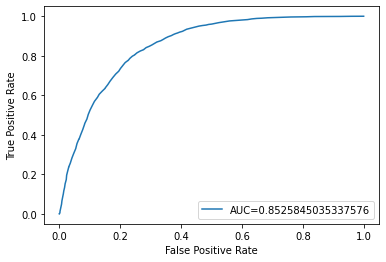

In [ ]:
# plotting ROC curve
y_pred_prob = rf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_prob)
auc = metrics.roc_auc_score(Y_test, y_pred_prob)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()